# tRAT 5

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.1 - 13/02/2025

---
---

## IMPORTANT: Write the number of your group here:

# Exercise

The classical Markowitz portfolio optimisation problem is
naturally expressed as a bi-criterion minimisation problem, where the objectives are the negative mean return (since we wish to maximize mean return) and the variance of the return

$$
\begin{array}{ll}
\min & (-\bar{p}^\top x,x^\top \Sigma x )\\
s.t. & \mathbf{1}^\top x =1, \\ &x\succeq 0.\end{array}
$$

where $\bar{p}$ is the price mean and $\Sigma$ is the covariance. The two constraints express that $x$ indicates the normalised fraction of investement put into each asset (so the components of $x$ must sum to $1$) and the fact that we do not allow negative investments, called *shorts*. We scalarize the problem using the parameter $\lambda$

$$
\begin{array}{ll}
\min & -\bar{p}^\top x + \lambda x^\top \Sigma x \\
s.t. & \mathbf{1}^\top x =1, \\ &x\succeq 0\end{array}
$$

The parameter $\lambda>0$ is called *risk aversion parameter*. The objective $-\bar{p}^\top x + \lambda x^\top \Sigma x$ is called *risk-adjusted return*.

Consider a simple portfolio optimization problem with
$4$ assets, with price mean and covariance given in the code below.

In [1]:
import numpy as np
import cvxpy as cp
n = 4
bar_p = np.array([0.12,0.1,0.07,0.03])
Sigma = np.zeros((n,n))
Sigma[0,0]=0.2*0.2
Sigma[1,1]=0.1*0.1
Sigma[2,2]=0.05*0.05
Sigma[3,3]=0

Note that asset $4$ is risk-free with certain $3\%$ return. The other assets have incresing return, ranging from $7\%$ to $12\%$, as well as increasing risk, ranging from $5\%$ to $20\%$.

1.    Construct the Pareto optimal curve for $\lambda \in [0.01,1000]$ (use a logarithmic spacing with $100$ points). The plot should have $\bar{p}^\top x_{opt}$ (mean return) on the $y$ axis and $\sqrt{x_{opt}^\top \Sigma x_{opt}}$ (standard deviation) on the $x$ axis.
2.    Explain the meaning of the left-most point of the Pareto optimal curve.
    

3.    Explain the meaning of the right-most point of the Pareto optimal curve.


4.    For each of the following points ($+/- 0.001$) in the plot, establish and explain whether they are optimal, non-optimal or infeasible:
    *    Standard deviation: $0.1$, Mean return: $0.108$
    *    Standard deviation: $0.05$, Mean return: $0.12$
    *    Standard deviation: $0.12$, Mean return: $0.05$

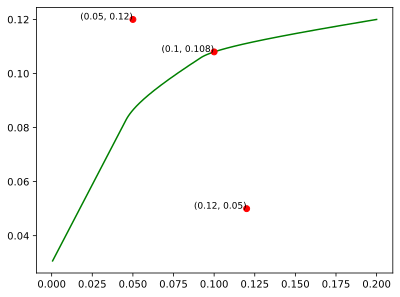

In [ ]:
# pareto optimal curve 
l = np.logspace(np.log10(0.01), np.log10(1000), 100)
mean_returns_opt = []
std_devs_opt = []

x = cp.Variable(n)
constraints = [
    cp.sum(x) == 1, 
    x >= 0
]
for i in l: 
    objective = cp.Minimize(-bar_p.T@x + i*cp.quad_form(x.T, Sigma))
    problem = cp.Problem(objective, constraints)
    problem.solve()
    # print(x.value)
    mean_returns_opt.append(bar_p.T@x.value)
    std_devs_opt.append(np.sqrt(cp.quad_form(x.value, Sigma).value))

x_opt = x.value

import matplotlib.pyplot as plt
plt.plot(std_devs_opt, mean_returns_opt, 'g-')

specific_points = [
    (0.1, 0.108),
    (0.05, 0.12),
    (0.12, 0.05)
]

for std_dev, mean_return in specific_points:
    plt.plot(std_dev, mean_return, 'ro')  
    plt.text(std_dev, mean_return, f'({std_dev}, {mean_return})', fontsize=9, ha='right')

plt.show()


# Feedback

- Q1 the Pareto optimal curve is correct.
- Q2 & Q3 the interpretation of points is only partially correct. 
- Q4 is only partially correct. 
- Please check Blackboard, under tRAT, for a complete solution.